# Load Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd drive/MyDrive/Thesis/Paper2

/content/drive/MyDrive/Thesis/Paper2


# Imports + Load Data

In [4]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import makedata        # to get the CIFAR10 data in the required format
import models

In [5]:
totalClass = 5
shufflePixels = True
shuffleLabels = False

In [6]:
# Load data
x_train, y_train, x_test, y_test, a, b = makedata.cifar(totalClass, shufflePixels)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

loaded data_batch_1
len of data_batch_1 :  10000
len of training data  10000
loaded data_batch_2
len of data_batch_2 :  10000
len of training data  20000
loaded data_batch_3
len of data_batch_3 :  10000
len of training data  30000
loaded data_batch_4
len of data_batch_4 :  10000
len of training data  40000
loaded data_batch_5
len of data_batch_5 :  10000
len of training data  50000
(25000, 32, 32, 3)
(25000, 32, 32, 3)
(25000, 5)
(5000, 32, 32, 3)
(5000, 5)


Populating the interactive namespace from numpy and matplotlib


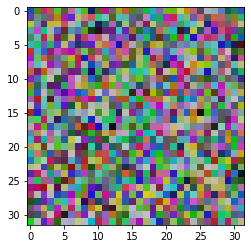

In [7]:
# Check Image data
im = x_train[88]
%pylab inline
imgplot = plt.imshow(im)
plt.show()

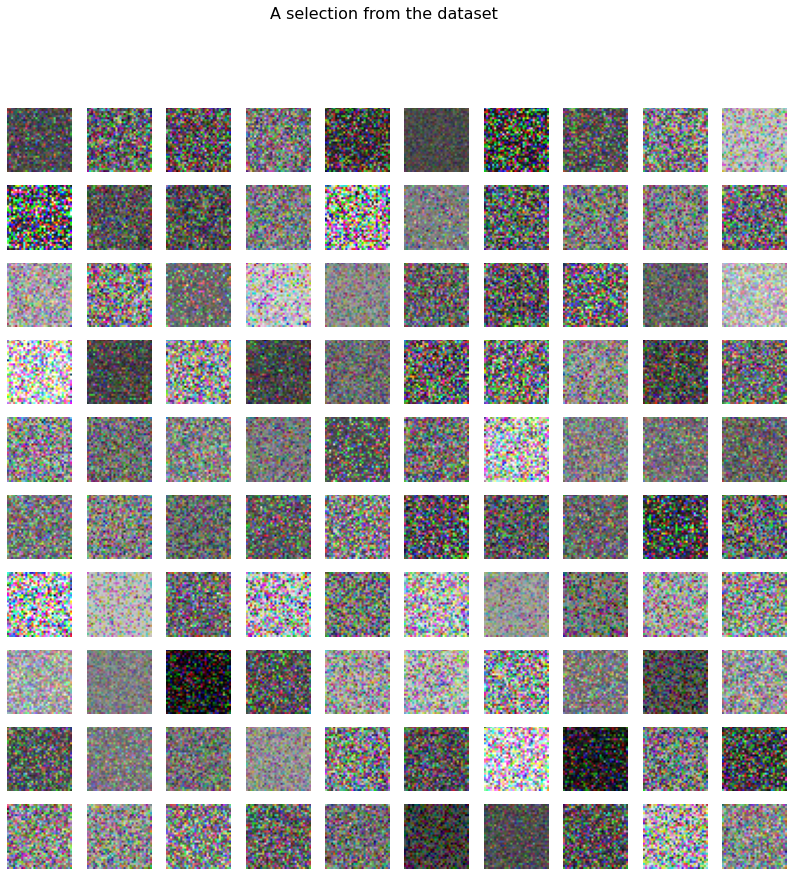

In [8]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(14, 14))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(x_train[idx], cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the dataset", fontsize=16)

#VGG16

In [9]:
vgg16 = models.vgg16(totalClass)
vgg16.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [10]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
49/49 [==============================] - 12s 53ms/step - loss: 1.6086 - accuracy: 0.2057
test loss, test acc: [1.6086208820343018, 0.20572000741958618]
Evaluate on test data
10/10 [==============================] - 1s 140ms/step - loss: 1.6084 - accuracy: 0.1964
test loss, test acc: [1.60837721824646, 0.1964000016450882]


In [11]:
vggResults = vgg16.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
250/250 [==============================] - 10s 33ms/step - loss: 1.5797 - accuracy: 0.2532 - val_loss: 1.5410 - val_accuracy: 0.2974
Epoch 2/250
250/250 [==============================] - 8s 32ms/step - loss: 1.5416 - accuracy: 0.2933 - val_loss: 1.5296 - val_accuracy: 0.3132
Epoch 3/250
250/250 [==============================] - 8s 31ms/step - loss: 1.5236 - accuracy: 0.3159 - val_loss: 1.5084 - val_accuracy: 0.3394
Epoch 4/250
250/250 [==============================] - 8s 31ms/step - loss: 1.5164 - accuracy: 0.3205 - val_loss: 1.5006 - val_accuracy: 0.3562
Epoch 5/250
250/250 [==============================] - 8s 32ms/step - loss: 1.5099 - accuracy: 0.3311 - val_loss: 1.4918 - val_accuracy: 0.3568
Epoch 6/250
250/250 [==============================] - 8s 32ms/step - loss: 1.5015 - accuracy: 0.3339 - val_loss: 1.4855 - val_accuracy: 0.3492
Epoch 7/250
250/250 [==============================] - 8s 31ms/step - loss: 1.4984 - accuracy: 0.3348 - val_loss: 1.4923 - val_accuracy

In [12]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
49/49 [==============================] - 2s 31ms/step - loss: 1.5999e-05 - accuracy: 1.0000
test loss, test acc: [1.599936695129145e-05, 1.0]
Evaluate on test data
10/10 [==============================] - 0s 30ms/step - loss: 10.4905 - accuracy: 0.2452
test loss, test acc: [10.490535736083984, 0.2451999932527542]


# Small

In [13]:
small = models.small(totalClass)
small.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
49/49 [==============================] - 1s 9ms/step - loss: 21.8893 - accuracy: 0.1998
test loss, test acc: [21.88931655883789, 0.19979999959468842]
Evaluate on test data
10/10 [==============================] - 0s 18ms/step - loss: 21.8230 - accuracy: 0.1998
test loss, test acc: [21.823036193847656, 0.19979999959468842]


In [15]:
smallResults = small.fit(x_train, y_train, 
                         batch_size=100, 
                         epochs=250, 
                         validation_data=(x_test, y_test))

Epoch 1/250
250/250 [==============================] - 3s 9ms/step - loss: 4.5576 - accuracy: 0.2249 - val_loss: 1.5646 - val_accuracy: 0.2644
Epoch 2/250
250/250 [==============================] - 2s 9ms/step - loss: 1.5877 - accuracy: 0.2592 - val_loss: 1.5483 - val_accuracy: 0.2918
Epoch 3/250
250/250 [==============================] - 2s 8ms/step - loss: 1.5670 - accuracy: 0.2720 - val_loss: 1.5469 - val_accuracy: 0.2890
Epoch 4/250
250/250 [==============================] - 2s 8ms/step - loss: 1.5583 - accuracy: 0.2776 - val_loss: 1.5429 - val_accuracy: 0.2994
Epoch 5/250
250/250 [==============================] - 2s 9ms/step - loss: 1.5492 - accuracy: 0.2817 - val_loss: 1.5390 - val_accuracy: 0.3052
Epoch 6/250
250/250 [==============================] - 2s 8ms/step - loss: 1.5463 - accuracy: 0.2841 - val_loss: 1.5288 - val_accuracy: 0.3050
Epoch 7/250
250/250 [==============================] - 2s 8ms/step - loss: 1.5418 - accuracy: 0.2863 - val_loss: 1.5286 - val_accuracy: 0.3048

In [16]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
49/49 [==============================] - 0s 8ms/step - loss: 1.0037 - accuracy: 0.6692
test loss, test acc: [1.003658652305603, 0.669160008430481]
Evaluate on test data
10/10 [==============================] - 0s 7ms/step - loss: 1.6319 - accuracy: 0.2902
test loss, test acc: [1.6318820714950562, 0.29019999504089355]


#tNet

In [17]:
tNet = models.tNet(totalClass)
tNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [18]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
49/49 [==============================] - 4s 53ms/step - loss: 3.0604 - accuracy: 0.2004
test loss, test acc: [3.060436248779297, 0.2003600001335144]
Evaluate on test data
10/10 [==============================] - 1s 99ms/step - loss: 3.0605 - accuracy: 0.2000
test loss, test acc: [3.060523748397827, 0.20000000298023224]


In [19]:
tNetResults = tNet.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
250/250 [==============================] - 13s 43ms/step - loss: 1.6053 - accuracy: 0.3165 - val_loss: 1.4881 - val_accuracy: 0.3566
Epoch 2/250
250/250 [==============================] - 10s 40ms/step - loss: 1.4397 - accuracy: 0.3752 - val_loss: 1.4815 - val_accuracy: 0.3566
Epoch 3/250
250/250 [==============================] - 10s 40ms/step - loss: 1.3404 - accuracy: 0.4249 - val_loss: 1.5172 - val_accuracy: 0.3350
Epoch 4/250
250/250 [==============================] - 10s 40ms/step - loss: 1.1988 - accuracy: 0.5015 - val_loss: 1.6159 - val_accuracy: 0.3190
Epoch 5/250
250/250 [==============================] - 10s 40ms/step - loss: 1.0232 - accuracy: 0.5914 - val_loss: 1.7085 - val_accuracy: 0.3046
Epoch 6/250
250/250 [==============================] - 10s 40ms/step - loss: 0.8359 - accuracy: 0.6792 - val_loss: 1.8624 - val_accuracy: 0.2940
Epoch 7/250
250/250 [==============================] - 10s 40ms/step - loss: 0.6584 - accuracy: 0.7589 - val_loss: 2.1068 - val_ac

In [20]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
49/49 [==============================] - 2s 41ms/step - loss: 9.1290e-04 - accuracy: 0.9998
test loss, test acc: [0.000912897870875895, 0.9998400211334229]
Evaluate on test data
10/10 [==============================] - 0s 42ms/step - loss: 5.2298 - accuracy: 0.2928
test loss, test acc: [5.229803562164307, 0.29280000925064087]


# ConvNet

In [21]:
convNet = models.convNet(totalClass)
convNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [22]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
49/49 [==============================] - 7s 84ms/step - loss: 3.5111 - accuracy: 0.2106
test loss, test acc: [3.5111281871795654, 0.21060000360012054]
Evaluate on test data
10/10 [==============================] - 2s 224ms/step - loss: 3.5240 - accuracy: 0.2078
test loss, test acc: [3.5240094661712646, 0.2078000009059906]


In [23]:
convNetResults = convNet.fit(x_train,y_train,
                             batch_size=100,
                             epochs=250,
                             validation_data=(x_test, y_test))

Epoch 1/250
250/250 [==============================] - 12s 41ms/step - loss: 1.5390 - accuracy: 0.3068 - val_loss: 1.4951 - val_accuracy: 0.3418
Epoch 2/250
250/250 [==============================] - 10s 40ms/step - loss: 1.4813 - accuracy: 0.3473 - val_loss: 1.4751 - val_accuracy: 0.3598
Epoch 3/250
250/250 [==============================] - 10s 40ms/step - loss: 1.4715 - accuracy: 0.3517 - val_loss: 1.4803 - val_accuracy: 0.3418
Epoch 4/250
250/250 [==============================] - 10s 40ms/step - loss: 1.4660 - accuracy: 0.3557 - val_loss: 1.4620 - val_accuracy: 0.3558
Epoch 5/250
250/250 [==============================] - 10s 40ms/step - loss: 1.4610 - accuracy: 0.3535 - val_loss: 1.4506 - val_accuracy: 0.3560
Epoch 6/250
250/250 [==============================] - 10s 40ms/step - loss: 1.4621 - accuracy: 0.3521 - val_loss: 1.4689 - val_accuracy: 0.3592
Epoch 7/250
250/250 [==============================] - 10s 40ms/step - loss: 1.4598 - accuracy: 0.3502 - val_loss: 1.4518 - val_ac

In [24]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
49/49 [==============================] - 2s 49ms/step - loss: 0.0231 - accuracy: 0.9896
test loss, test acc: [0.02309218794107437, 0.9895600080490112]
Evaluate on test data
10/10 [==============================] - 0s 47ms/step - loss: 4.4179 - accuracy: 0.2926
test loss, test acc: [4.417932987213135, 0.29260000586509705]


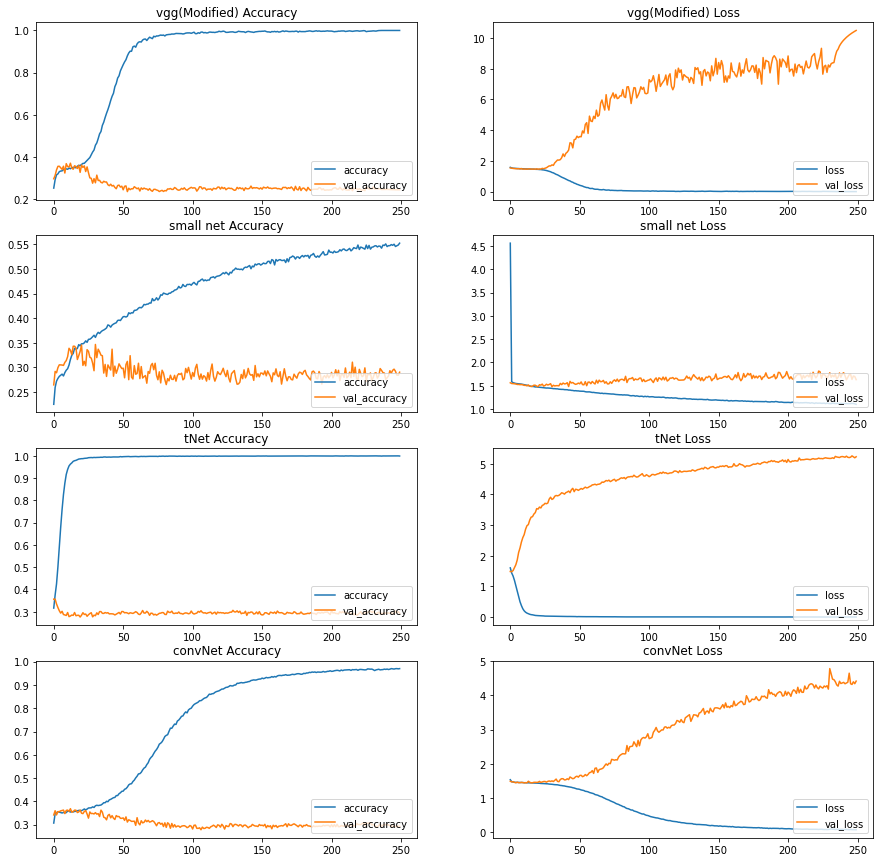

In [25]:
fig, axs = plt.subplots(4, 2, figsize=(15, 15))
i = 0
name = ['vgg(Modified)', 'small net', 'tNet', 'convNet']
for history in [vggResults, smallResults, tNetResults, convNetResults]:
    axs[i, 0].set_title(name[i]+" Accuracy", fontsize=12)
    axs[i, 0].plot(history.history['accuracy'], label='accuracy')
    axs[i, 0].plot(history.history['val_accuracy'], label = 'val_accuracy')
    #axs[i, 0].xlabel('Epoch')
    #axs[i, 0].ylabel('Accuracy')
    #axs[i, 0].ylim([0.5, 1])
    axs[i, 0].legend(loc='lower right')

    axs[i, 1].set_title(name[i]+" Loss", fontsize=12)
    axs[i, 1].plot(history.history['loss'], label='loss')
    axs[i, 1].plot(history.history['val_loss'], label = 'val_loss')
    #axs[i, 1].xlabel('Epoch')
    #axs[i, 1].ylabel('Loss')
    #axs[i, 1].ylim([0.0, 4.0])
    axs[i, 1].legend(loc='lower right')
    i = i + 1
